In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
cd /content/drive/"MyDrive/"

/content/drive/MyDrive


In [6]:

dataset = pd.read_csv('Colab Notebooks/Linear Regression/time_series_covid19_deaths_US.csv')


In [7]:
dataset

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,160,160,161,161,161,162,162,162,162,162
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,593,593,594,594,598,601,603,603,603,603
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,81,81,81,81,83,83,83,83,83,83
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,95,95,95,95,95,95,95,95,95,95
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,198,198,198,198,198,199,202,202,202,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,14,14,14,14,14,14,14,14,14,14
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,31,31,34,34,34,34,34,34,34,34
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,37,37,39,39,39,39,39,39,39,41


Analysing the dataset

In [8]:
dataset.shape

(3342, 733)

In [9]:
type(dataset)

pandas.core.frame.DataFrame

In [10]:

dataf= pd.DataFrame(dataset)

In [11]:
dataf.describe()

,UID,code3,FIPS,Lat,Long_,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22
count,3.342000e+03,3342.000000,3332.000000,3342.000000,3342.000000,3.342000e+03,3342.000000,3342.000000,3342.000000,3342.000000,...,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000
mean,8.342992e+07,834.494913,33043.078932,36.721617,-88.642045,9.960357e+04,0.000299,0.000299,0.000299,0.000299,...,247.243866,247.748953,248.394375,248.988630,249.548175,250.330640,250.528426,250.647816,251.196888,251.987133
std,4.314076e+06,36.487378,18648.808931,9.079322,21.776287,3.241661e+05,0.017298,0.017298,0.017298,0.017298,...,936.132294,937.010542,938.688659,939.992162,941.748140,943.997839,944.615557,945.280687,947.253373,949.317412
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.401811e+07,840.000000,19076.500000,33.896803,-97.803595,9.917250e+03,0.000000,0.000000,0.000000,0.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
50%,8.402921e+07,840.000000,31012.000000,38.005610,-89.488865,2.489150e+04,0.000000,0.000000,0.000000,0.000000,...,71.500000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,73.000000,73.000000
75%,8.404612e+07,840.000000,47129.500000,41.579255,-82.313398,6.497525e+04,0.000000,0.000000,0.000000,0.000000,...,177.750000,178.000000,179.000000,179.000000,179.750000,180.750000,180.750000,180.750000,180.750000,181.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,1.003911e+07,1.000000,1.000000,1.000000,1.000000,...,27640.000000,27647.000000,27671.000000,27698.000000,27728.000000,27756.000000,27772.000000,27785.000000,27798.000000,27812.000000


In [12]:
col = list(dataset.columns.values)
print(col)

['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/

In [13]:

col_value = (list(dataf.sum(axis = 0, skipna = True)))
#print(col_value)
df1 = pd.DataFrame(list(zip(col, col_value)),columns =['Title', 'Values'])

#df1.set_index('Title',inplace=True)
#print(df1)
#df1.drop(df1.index[["Province/State"]])

data = df1.drop(df1.index)
print(df1)



       Title                                             Values
0        UID                                       278822801147
1       iso2  USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
2       iso3  USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...
3      code3                                            2788882
4       FIPS                                        110099539.0
..       ...                                                ...
727   1/6/22                                             836605
728   1/7/22                                             837266
729   1/8/22                                             837665
730   1/9/22                                             839500
731  1/10/22                                             842141

[732 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [14]:
col1 = list(df1.columns.values)
print(col1)


['Title', 'Values']


In [15]:
x_value=df1.iloc[11:,0:1]
y_value=df1.iloc[11:,1:2]

In [16]:
x_value

,Title
11,Population
12,1/22/20
13,1/23/20
14,1/24/20
15,1/25/20
...,...
727,1/6/22
728,1/7/22
729,1/8/22
730,1/9/22


In [17]:

y_value

,Values
11,1
12,1
13,1
14,1
15,1
...,...
727,836605
728,837266
729,837665
730,839500


In [18]:
#cleaning the dataset
#remove the na values
training_dataset=df1
cleaned_dataset=training_dataset.dropna()

In [19]:
cleaned_dataset.shape

(732, 2)

In [20]:
cleaned_dataset

,Title,Values
0,UID,278822801147
1,iso2,USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
2,iso3,USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...
3,code3,2788882
4,FIPS,110099539.0
...,...,...
727,1/6/22,836605
728,1/7/22,837266
729,1/8/22,837665
730,1/9/22,839500


In [21]:
x_new = cleaned_dataset['Title']

In [22]:
y_new = cleaned_dataset['Values']

In [23]:
x_value1=cleaned_dataset.iloc[11:,0:1]
y_value1=cleaned_dataset.iloc[11:,1:2]
print(x_value1)


          Title
11   Population
12      1/22/20
13      1/23/20
14      1/24/20
15      1/25/20
..          ...
727      1/6/22
728      1/7/22
729      1/8/22
730      1/9/22
731     1/10/22

[721 rows x 1 columns]


In [24]:
x_train = x_value1.values.reshape(x_value1.size)

In [25]:
y_train = y_value1.values.reshape(y_value1.size)

In [26]:
dates = x_value1['Title']
#print(dates)
date_format = [pd.to_datetime(d) for d in dates]
print(date_format)

ParserError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5 ))
ax.grid()
ax.scatter(date_format,y_value1['Values'])
ax.set(xlabel="Date",ylabel="recovered case")
date_form = DateFormatter('%d-%m-%y')
#print(date_form)
ax.xaxis.set_major_formatter(date_form)
#ax.xaxis.set_major_locator(mdates.DayLocator(interval = 15))
plt.show()

In [27]:

df1['Time'] = np.arange(len(df1.index))

In [28]:
print(df1)

       Title                                             Values  Time
0        UID                                       278822801147     0
1       iso2  USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...     1
2       iso3  USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...     2
3      code3                                            2788882     3
4       FIPS                                        110099539.0     4
..       ...                                                ...   ...
727   1/6/22                                             836605   727
728   1/7/22                                             837266   728
729   1/8/22                                             837665   729
730   1/9/22                                             839500   730
731  1/10/22                                             842141   731

[732 rows x 3 columns]


In [29]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

# Training data
X = df1.loc[11:500, ['Time']]  # features
y = df1.loc[11:500, 'Values']  # target

reg = Lasso(alpha=1)
reg.fit(X,y)

y_pred1 = pd.Series(reg.predict(X), index=X.index)
print(y_pred1)

11     -81415.209219
12     -80072.000233
13     -78728.791248
14     -77385.582262
15     -76042.373277
           ...      
496    570041.148787
497    571384.357772
498    572727.566758
499    574070.775744
500    575413.984729
Length: 490, dtype: float64


In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X, y)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X, y)
mean_squared_error(y, lasso.predict(X))
pd.Series(lasso.coef_, index=X.columns)



In [33]:
from sklearn.linear_model import LinearRegression

# Training data
X = df1.loc[11:500, ['Time']]  # features
y = df1.loc[11:500, 'Values']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

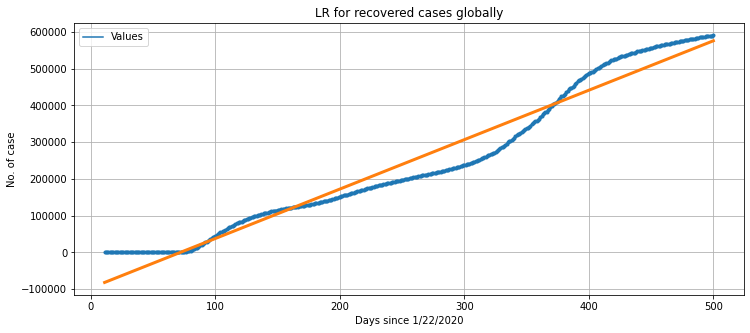

In [35]:
plot_params = dict(
    style=".-",
    legend=True,
)

#fig, ax = plt.subplots(figsize=(12, 5 ))
##ax.grid()
#ax.scatter(date_format,y_value1['Values'])
#ax.set(xlabel="Date",ylabel="Recovered case")

fig, ax = plt.subplots(figsize=(12, 5 ))
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('LR for recovered cases globally');
ax.set(xlabel="Days since 1/22/2020",ylabel="No. of case")
ax.grid();

